In [1]:
import cymetric as cym
import matplotlib as plt 
import pandas as pd
import sys 
sys.path.insert(0, '../../transition-scenarios/scripts/')
import transition_plots as tp

In [2]:
from cymetric import fco_metrics
from cymetric import filters
from cymetric import timeseries

In [3]:
output_file = '../cyclus-files/oat/cooling-time/ct0.sqlite'
db = cym.dbopen(output_file)
ev = cym.Evaluator(db=db,write=True)

Deployment

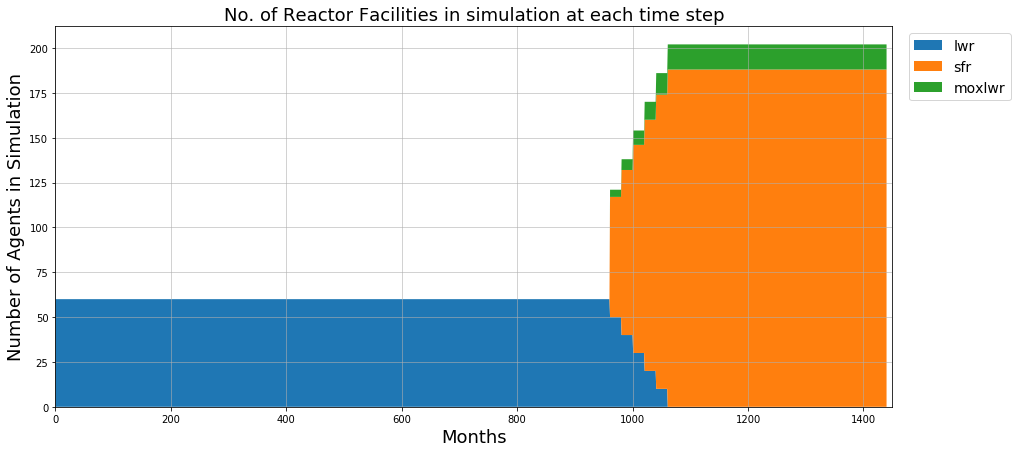

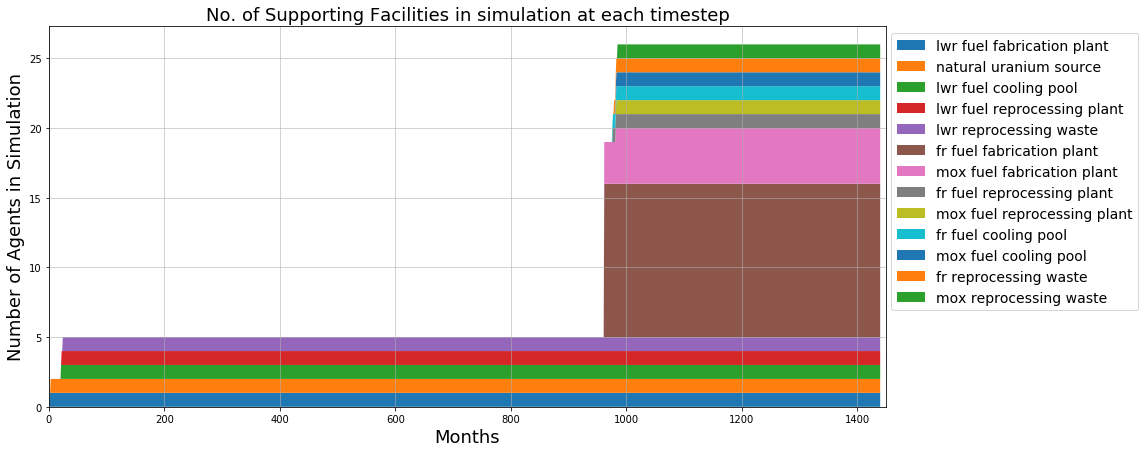

In [4]:
all_agents = tp.format_agent_dict(output_file,simple=False)
tp.plot_agents(all_agents,name='ct0',simple=False)

Electricity Production

In [6]:
ep = ev.eval('FcoMonthlyElectricityGenerated')

In [ ]:
ep.plot(x='Month',y='Energy',grid='True')

WM: Total HLW Inventory (Final) 

In [ ]:
hlw = cym.timeseries.transactions(ev,commodities=['lwrreprocessingwaste','moxreprocessingwaste','frreprocessingwaste'])
hlw = hlw['Mass'].cumsum()

In [ ]:
hlw.plot()

In [ ]:
hlw.iloc[-1]

WM: Depleted Uranium (Final)

In [ ]:
du = cym.timeseries.transactions(ev,commodities=['enrichmentwaste'])
du = du['Mass'].cumsum()

In [ ]:
du.plot()

In [ ]:
du.iloc[-1]

Proliferation: Pu in FR cooling pool

In [ ]:
pu_cp = cym.timeseries.inventories(ev,facilities=['fr'])

In [ ]:
pu_cp.plot(x='Time',y='Quantity',grid='True')

In [ ]:
pu_cp.max()[1]

Proliferation: Pu in LWR cooling pool

In [ ]:
lwr = cym.timeseries.inventories(ev,facilities=['lwr1'])

In [ ]:
lwr.plot(x='Time',y='Quantity',grid='True')

Deployment 